In [1]:
import sys
import pandas as pd
import panel as pn
import holoviews as hv
import numpy as np
import panel as pn
import torch
import rich.traceback

# rich.traceback.install(show_locals=True)

sys.path.append("/home/tyler/Documents/repos/masthay_helpers")
from mh.jupyter import iplot, plot_series, rules_one, rules_two
from returns.curry import curry

In [2]:
# Necessary setup from panel -- read docs if this confuses you.
pn.extension()

# Seed for reproducibility
np.random.seed(0)

# Setup the shape and populate random data
data_shape = (3, 50, 50, 30, 20)
variance = 100000.0
random_data = variance * torch.randn(*data_shape)
hv.extension("matplotlib")
print(hv.Store.current_backend)

matplotlib


In [3]:
labels = [f"Random_Data_{i}" for i in range(data_shape[0])]
column_names = ["shot_no", "receiver_idx", "nonphysical_dummy", "time sample"]
rules = {
    "one": rules_one(
        opts_info={"yscale": {"args": ("linear",), "kwargs": {}}},
        loop_info={"labels": labels},
    ),
    "two": rules_two(
        opts_info={"colorbar": True},
        loop_info={"labels": labels, "yscale": "symlog"},
    ),
}

In [4]:
import inspect

u = plot_series(data=random_data, rules=rules, idx=[0, 0, 0])
print(inspect.signature(u))

(*, data, rules, merge, idx, kw)


Row
    [0] Column
        [0] RadioBoxGroup(inline=True, name='Dimension', options=['1D', '2D'], value='1D')
        [1] Checkbox(name='Transpose?')
        [2] Checkbox(name='Invert Horizontal Axis?')
        [3] Checkbox(name='Invert Vertical Axis?')
        [4] Select(name='Colormap', options=['magma', 'inferno', ...], value='nipy_spectral')
        [5] IntSlider(end=49, name='shot_no (IGNORE S...)
        [6] IntSlider(end=49, name='receiver_idx (...)
        [7] IntSlider(end=29, name='nonphysical_dummy')
        [8] IntSlider(end=19, name='time sample')
        [9] IntInput(end=3, name='Special Dimension 0', start=0)
        [10] IntInput(end=3, name='Special Dimension 1', start=0, value=1)
        [11] ParamFunction(function, _pane=Str, defer_load=False)
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)
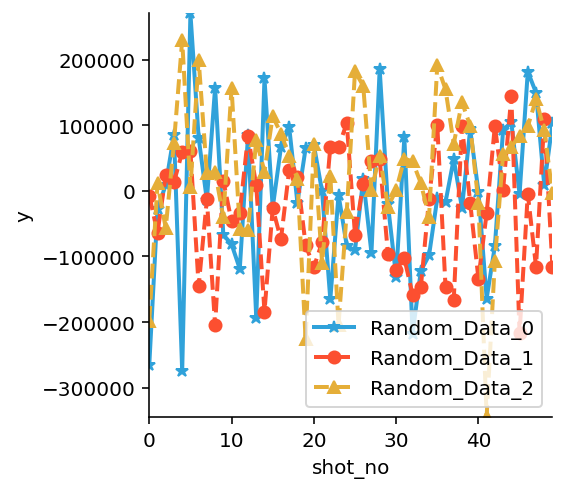

In [5]:
layout = iplot(data=random_data, column_names=column_names, cols=2, rules=rules)
layout.servable()